# NYC Property Appraisal - Regression Model

## 1. Data Analysis & Cleaning

In [46]:
%matplotlib inline
import pandas as pd
pd.options.display.max_columns=30

In [47]:
data = pd.read_csv('train.csv')

It is obvious that *'SalePrice'* is the y_label we want to predict.

In [30]:
data.head() # There are three categorical columns

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [48]:
data.shape

(1460, 81)

In [49]:
data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [51]:
df=data.drop(columns=['LotFrontage'])

In [53]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Visualise distribution & check if any outliers or erroneous values 

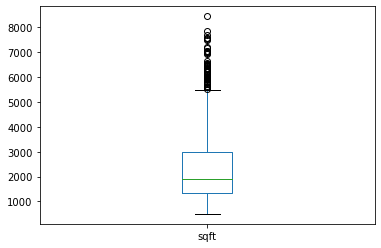

In [13]:
data.sqft.plot.box() 

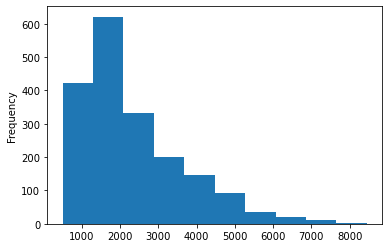

In [14]:
data.sqft.plot.hist() 

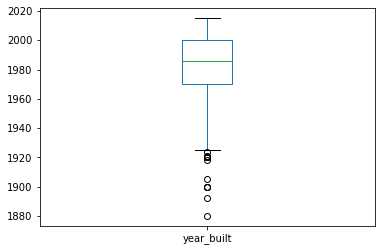

In [15]:
data.year_built.plot.box()

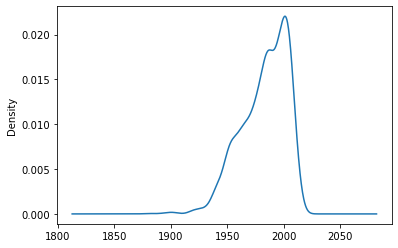

In [16]:
data.year_built.plot.kde() # the construction years are centered around 1970 to 2010

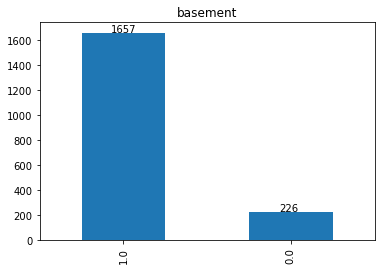

In [17]:
ax = data.basement.value_counts().plot.bar(title='basement') # most are with basement
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005 + 0.175, p.get_height() * 1.005))

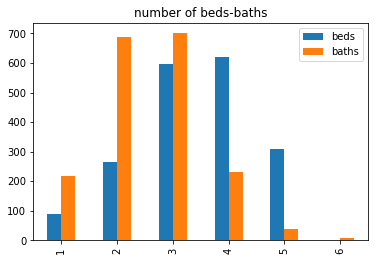

In [18]:
data[['beds','baths']].apply(pd.value_counts).plot.bar(title='number of beds-baths')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005 + 0.175, p.get_height() * 1.005))

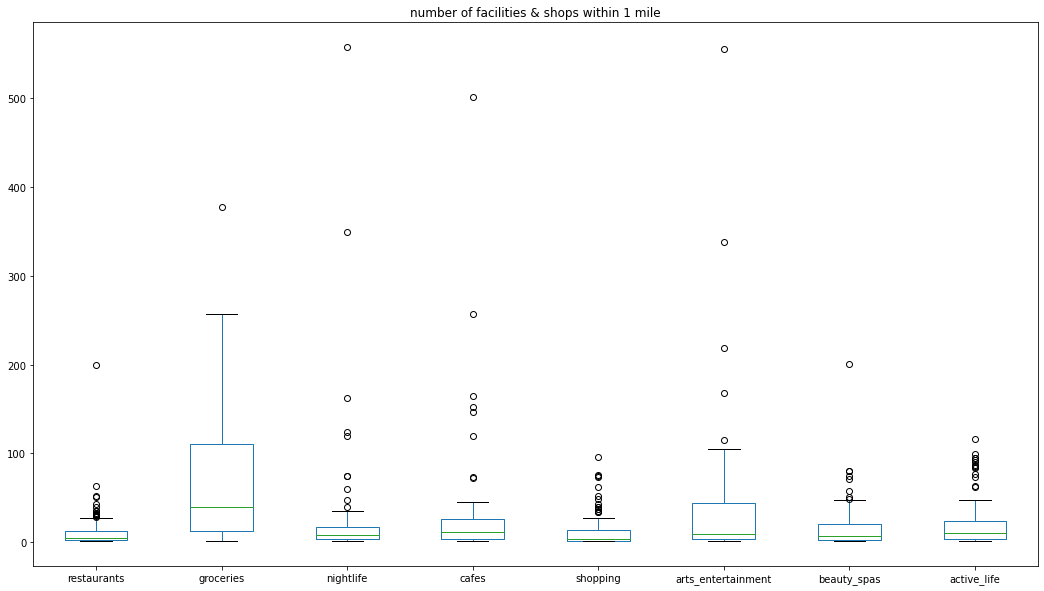

In [19]:
ax = data[['restaurants', 'groceries', 'nightlife', 'cafes', 'shopping', 'arts_entertainment', 'beauty_spas', 'active_life']].\
    apply((pd.value_counts)).plot.box(figsize=(18,10), title='number of facilities & shops within 1 mile')
    # number of facilities within 1 mile

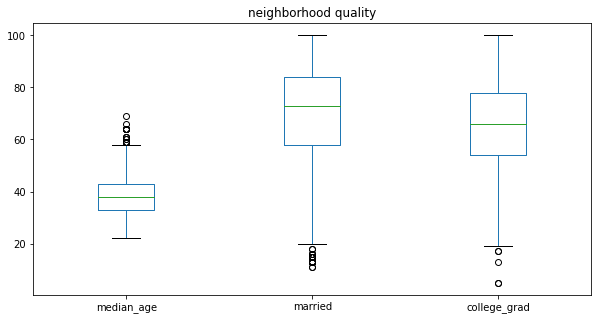

In [20]:
data[['median_age', 'married', 'college_grad']].plot.box(figsize=(10,5), title='neighborhood quality') # neighborhood quality

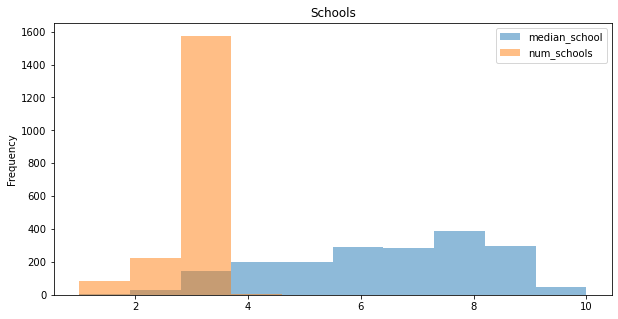

In [21]:
data[['median_school', 'num_schools']].plot.hist(figsize=(10,5), alpha=0.5, title='Schools')

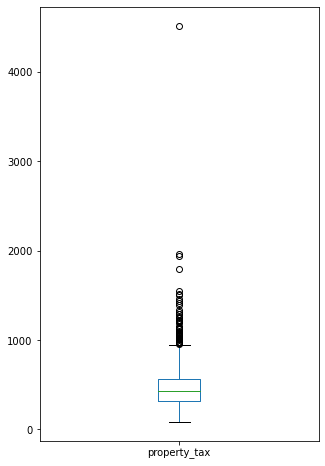

In [22]:
data.property_tax.plot.box(figsize=(5,8))

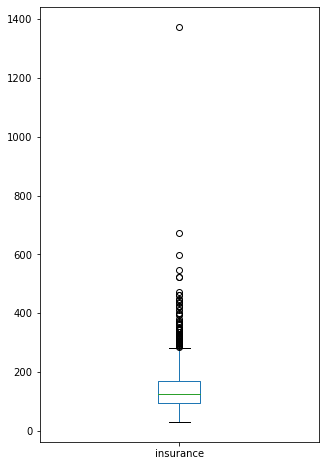

In [23]:
data.insurance.plot.box(figsize=(5,8))

## 2.Feature Engineering

* One important missing feature is the age of the property!
* Which is simply: *tx_year - year_built*

In [24]:
data.year_built.sort_values().unique()

array([1880, 1892, 1900, 1905, 1918, 1920, 1921, 1924, 1925, 1927, 1929,
       1930, 1932, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [25]:
data['age'] = data.apply(lambda x: x['tx_year'] - x['year_built'], axis=1 )

In [26]:
data.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,age
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,41
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,49
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,5
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,10


In [27]:
data.age.sort_values().unique()

array([ -8,  -7,  -4,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,
         8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,
        21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  77,  78,  79,  80,  82,  85,  86,  89,  90,  94,
       101, 103, 104, 110, 113, 114])

In [28]:
data.iloc[:,4::19].sort_values(by='year_built', ascending=False)[:10]

,year_built,tx_year
1540,2015,2014
1864,2015,2013
1828,2015,2007
1840,2014,2014
1207,2014,2014
1769,2014,2014
0,2013,2013
1818,2013,2013
111,2013,2013
1809,2013,2012


Some properties are sold before it finished construction.

That is why we have negative *age* values.

In [29]:
data.drop('property_type', 1, inplace=True)

In [30]:
data.to_csv('data_cooked.csv', index=False) # Now, output to cleaned & engineered table for use

## 3.Modelling

In [54]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 3.1Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [57]:
X=df.drop(columns=['SalePrice'])

In [58]:
y=df['SalePrice']

In [59]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=99,
                                                   test_size=0.3, )

In [60]:
print('train_X.shape:', train_X.shape,
     '\ntrain_y.shape:', train_y.shape,
     '\ntest_X.shape:', test_X.shape,
     '\ntest_y.shape:', test_y.shape)

train_X.shape: (1022, 79) 
train_y.shape: (1022,) 
test_X.shape: (438, 79) 
test_y.shape: (438,)


In [61]:
rrr = RandomForestRegressor(n_estimators=100)
rrr = rrr.fit(train_X, train_y)

ValueError: could not convert string to float: 'RL'

In [37]:
yhat_rrr = rrr.predict(test_X)
mean_absolute_error(test_y, yhat_rrr)

46052.933486725669

Tuning number of estimators via gridsearch:

In [62]:
def get_mae_rf(num_est, predictors_train, predictors_val, targ_train, targ_val):

    # fitting model with input max_leaf_nodes
    model = RandomForestRegressor(n_estimators=num_est, random_state=0)

    # fitting the model with training dataset
    model.fit(predictors_train, targ_train)

    # making prediction with the test dataset
    preds_val = model.predict(predictors_val)

    # calculate and return the MAE
    mae = mean_absolute_error(targ_val, preds_val)
    return(mae)

In [39]:
import time
start = time.clock()

plot_mae = []
estimator = range(2,100)

for num_est in range(2,100):
    my_mae = get_mae_rf(num_est,train_X,test_X,train_y,test_y)
    print("num_est : %d \t\t Mean Absolute Error:  %d" %(num_est,my_mae))
    plot_mae.append(my_mae)

print (time.clock() - start)

num_est : 2 		 Mean Absolute Error:  58775
num_est : 3 		 Mean Absolute Error:  54786
num_est : 4 		 Mean Absolute Error:  51000
num_est : 5 		 Mean Absolute Error:  49162
num_est : 6 		 Mean Absolute Error:  47648
num_est : 7 		 Mean Absolute Error:  47152
num_est : 8 		 Mean Absolute Error:  47404
num_est : 9 		 Mean Absolute Error:  47464
num_est : 10 		 Mean Absolute Error:  47479
num_est : 11 		 Mean Absolute Error:  47503
num_est : 12 		 Mean Absolute Error:  47329
num_est : 13 		 Mean Absolute Error:  47571
num_est : 14 		 Mean Absolute Error:  47755
num_est : 15 		 Mean Absolute Error:  47719
num_est : 16 		 Mean Absolute Error:  47538
num_est : 17 		 Mean Absolute Error:  47702
num_est : 18 		 Mean Absolute Error:  47351
num_est : 19 		 Mean Absolute Error:  47075
num_est : 20 		 Mean Absolute Error:  47104
num_est : 21 		 Mean Absolute Error:  47142
num_est : 22 		 Mean Absolute Error:  46920
num_est : 23 		 Mean Absolute Error:  46916
num_est : 24 		 Mean Absolute Error:  46

In [40]:
import time
start = time.clock()

plot_mae = []
estimator = range(2,100)

for num_est in range(340,350):
    my_mae = get_mae_rf(num_est,train_X,test_X,train_y,test_y)
    print("num_est : %d \t\t Mean Absolute Error:  %d" %(num_est,my_mae))
    plot_mae.append(my_mae)

print (time.clock() - start)

num_est : 340 		 Mean Absolute Error:  45897
num_est : 341 		 Mean Absolute Error:  45891
num_est : 342 		 Mean Absolute Error:  45873
num_est : 343 		 Mean Absolute Error:  45870
num_est : 344 		 Mean Absolute Error:  45868
num_est : 345 		 Mean Absolute Error:  45865
num_est : 346 		 Mean Absolute Error:  45866
num_est : 347 		 Mean Absolute Error:  45868
num_est : 348 		 Mean Absolute Error:  45884
num_est : 349 		 Mean Absolute Error:  45877
31.643173999999995


Even if we are increasing the number of estimators, it seems that it is not getting any better then the first trial.

At aounrd 350 round, it starts to get better results.

In [63]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
features = train_X.columns
importances = rrr.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances - Random Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

### 3.2XGBoost

In [42]:
from xgboost import XGBRegressor

In [43]:
xgbr = XGBRegressor()

In [44]:
xgbr.fit(train_X, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [45]:
xgbr.feature_importances_

array([ 0.03768116,  0.00724638,  0.12028985,  0.06086956,  0.03043478,
        0.00289855,  0.01449275,  0.01594203,  0.0057971 ,  0.01884058,
        0.01304348,  0.01594203,  0.01304348,  0.01594203,  0.01304348,
        0.02173913,  0.03188406,  0.0768116 ,  0.17536232,  0.0173913 ,
        0.        ,  0.2173913 ,  0.07391305], dtype=float32)

In [46]:
train_X.columns

Index(['beds', 'baths', 'sqft', 'year_built', 'lot_size', 'basement',
       'restaurants', 'groceries', 'nightlife', 'cafes', 'shopping',
       'arts_entertainment', 'beauty_spas', 'active_life', 'median_age',
       'married', 'college_grad', 'property_tax', 'insurance', 'median_school',
       'num_schools', 'tx_year', 'age'],
      dtype='object')

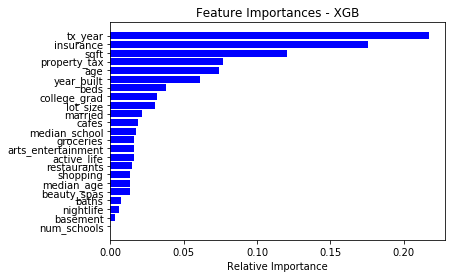

In [47]:
for y,x in sorted(zip(xgbr.feature_importances_, train_X.columns), reverse=False):
    #print (x,y)
    plt.barh(x,y, color='b')
    plt.title('Feature Importances - XGB')
    plt.xlabel('Relative Importance')

In [48]:
yhat_xgb = xgbr.predict(test_X)
mean_absolute_error(test_y, yhat_xgb)

45025.599529867257

### 3.3LightGBM

In [49]:
import lightgbm as lgb

In [50]:
#lgr = lgb.LGBMRegressor(num_leaves=10, n_estimators=150, learning_rate=0.3, max_depth=3, min_child_samples=1)
lgr = lgb.LGBMRegressor()

In [51]:
lgr.fit(train_X, train_y, eval_set=(test_X, test_y))

[1]	valid_0's l2: 2.41605e+10
[2]	valid_0's l2: 2.41369e+10
[3]	valid_0's l2: 2.41134e+10
[4]	valid_0's l2: 2.40895e+10
[5]	valid_0's l2: 2.4066e+10
[6]	valid_0's l2: 2.40422e+10
[7]	valid_0's l2: 2.40184e+10
[8]	valid_0's l2: 2.3995e+10
[9]	valid_0's l2: 2.39712e+10
[10]	valid_0's l2: 2.39475e+10
[11]	valid_0's l2: 2.39238e+10
[12]	valid_0's l2: 2.39004e+10
[13]	valid_0's l2: 2.38767e+10
[14]	valid_0's l2: 2.38531e+10
[15]	valid_0's l2: 2.38298e+10
[16]	valid_0's l2: 2.38062e+10
[17]	valid_0's l2: 2.37826e+10
[18]	valid_0's l2: 2.37593e+10
[19]	valid_0's l2: 2.37358e+10
[20]	valid_0's l2: 2.37123e+10
[21]	valid_0's l2: 2.36891e+10
[22]	valid_0's l2: 2.36656e+10
[23]	valid_0's l2: 2.36421e+10
[24]	valid_0's l2: 2.36187e+10
[25]	valid_0's l2: 2.3595e+10
[26]	valid_0's l2: 2.35714e+10
[27]	valid_0's l2: 2.35483e+10
[28]	valid_0's l2: 2.35247e+10
[29]	valid_0's l2: 2.35016e+10
[30]	valid_0's l2: 2.34781e+10
[31]	valid_0's l2: 2.34551e+10
[32]	valid_0's l2: 2.34316e+10
[33]	valid_0's l2: 2

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
       n_jobs=-1, num_leaves=31, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1)

In [52]:
yhat_lgr = lgr.predict(test_X)
mean_absolute_error(test_y, yhat_lgr)

121103.29577598203

Hmm the mae is bit too high, let's do some manual tuning.

In [53]:
lgr = lgb.LGBMRegressor(n_estimators=10000)
lgr.fit(train_X, train_y, eval_set=(test_X, test_y), verbose=False)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=10000,
       n_jobs=-1, num_leaves=31, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1)

In [54]:
yhat_lgr = lgr.predict(test_X)
mean_absolute_error(test_y, yhat_lgr)

48051.45830198504

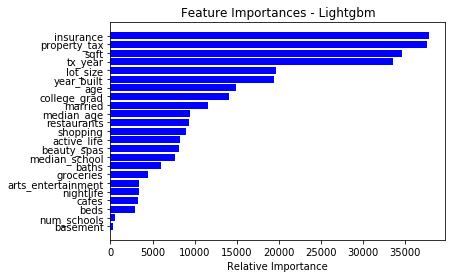

In [55]:
for y,x in sorted(zip(lgr.feature_importances_, train_X.columns), reverse=False):
    #print (x,y)
    plt.barh(x,y, color='b')
    plt.title('Feature Importances - Lightgbm')
    plt.xlabel('Relative Importance')

### 3.3CatBoost

In [56]:
from catboost import CatBoostRegressor

In [57]:
catr = CatBoostRegressor()

In [58]:
catr.fit(train_X, train_y, eval_set=(test_X, test_y))

0:	learn: 437495.0549052	test: 437723.3685829	best: 437723.3685829 (0)	total: 63.2ms	remaining: 1m 3s
1:	learn: 425992.6066846	test: 426501.5594061	best: 426501.5594061 (1)	total: 68.7ms	remaining: 34.3s
2:	learn: 414378.3162013	test: 415015.2880961	best: 415015.2880961 (2)	total: 73.1ms	remaining: 24.3s
3:	learn: 403370.6254951	test: 404239.3898016	best: 404239.3898016 (3)	total: 76.6ms	remaining: 19.1s
4:	learn: 392870.0151548	test: 393944.8265820	best: 393944.8265820 (4)	total: 79.9ms	remaining: 15.9s
5:	learn: 382755.2764853	test: 384110.6477866	best: 384110.6477866 (5)	total: 83.1ms	remaining: 13.8s
6:	learn: 372777.3817192	test: 374242.8287849	best: 374242.8287849 (6)	total: 87ms	remaining: 12.3s
7:	learn: 363170.1680121	test: 364913.2769081	best: 364913.2769081 (7)	total: 90.6ms	remaining: 11.2s
8:	learn: 353497.1600502	test: 355466.7124258	best: 355466.7124258 (8)	total: 93.8ms	remaining: 10.3s
9:	learn: 344367.3405380	test: 346493.2402822	best: 346493.2402822 (9)	total: 97ms	r

In [59]:
yhat_catr = catr.predict(test_X)

In [60]:
mean_absolute_error(test_y, yhat_catr)

43525.695649187161

Hola! Catboost's default setting is already giving the lowest MAE amongst other models!

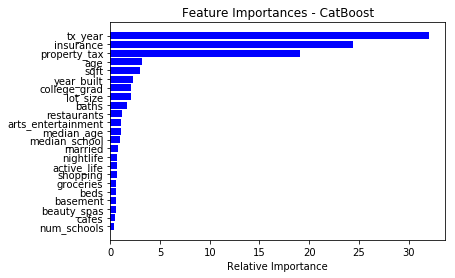

In [61]:
for y,x in sorted(zip(catr.feature_importances_, train_X.columns), reverse=False):
    #print (x,y)
    plt.barh(x,y, color='b')
    plt.title('Feature Importances - CatBoost')
    plt.xlabel('Relative Importance')

## 4.Results

#### 4 different tree-based model are tested with MAE:
* Random Forest (default): 46052
* Xgboost (default): 45025
* Lightgbm (tuned): 48051
* Catboost (default): 43525

As such, this is significantly better then the $70,000 MAE by industrial appraisers! *(Are property appraisers going to be replaced by machine learning!?)*

Next Step: Tuning parameters of each model.

For project background and documentation, please refer to README file.